In [1]:
from sklearn.datasets import load_digits
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers.noise import GaussianNoise
from keras.optimizers import SGD, Adam

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from matplotlib import pyplot as plt

from keras.utils import np_utils

np.random.seed(7)

Using TensorFlow backend.


In [2]:
def test(model, optimizer, loss, metrics, epochs, batch_size):
    # Compile model
    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
    # Fit the model
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)
    # evaluate the model
    scores = model.evaluate(X_test, y_test)
    for metric, score in zip(model.metrics_names, scores):
        print(f'{metric}: {score}')

In [3]:
data = load_digits()
X = data.data.reshape(-1, 8, 8, 1)
y = data.target
y = np_utils.to_categorical(y)
print(y[:10])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [4]:
X[0, ..., 0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

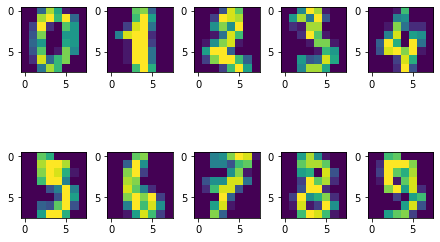

In [5]:
fig, axs = plt.subplots(2, 5, constrained_layout=True)
for i in range(10):
    axs.flat[i].imshow(X[i, ..., 0])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True, random_state=7)

In [7]:
model = Sequential([
        GaussianNoise(1, input_shape=(8, 8, 1)),
        Conv2D(3, (3, 3), activation='relu'),
        GaussianNoise(0.1),
        Dropout(0.1),
        Conv2D(3, (3, 3), activation='relu'),
        GaussianNoise(0.01),
        Dropout(0.01),
        Conv2D(3, (3, 3), activation='relu'),
        Flatten(),
        Dense(16 * 3 * 3 * 3, activation='relu'),
        Dense(16 * 3, activation='relu'),
        Dense(10, activation='softmax')
])
test(
    model,
    optimizer = Adam(lr=0.001),
    # для многоклассовой классификации
    loss = 'categorical_crossentropy',
    metrics=['accuracy'],
    epochs=150,
    batch_size=100
)

Epoch 1/150
1437/1437 [==============================] - 0s 315us/step - loss: 2.1928 - accuracy: 0.1935
Epoch 2/150
1437/1437 [==============================] - 0s 56us/step - loss: 1.9210 - accuracy: 0.3215
Epoch 3/150
1437/1437 [==============================] - 0s 54us/step - loss: 1.7113 - accuracy: 0.4022
Epoch 4/150
1437/1437 [==============================] - 0s 49us/step - loss: 1.5191 - accuracy: 0.4642
Epoch 5/150
1437/1437 [==============================] - 0s 52us/step - loss: 1.3889 - accuracy: 0.5247
Epoch 6/150
1437/1437 [==============================] - 0s 48us/step - loss: 1.2300 - accuracy: 0.5755
Epoch 7/150
1437/1437 [==============================] - 0s 75us/step - loss: 1.0918 - accuracy: 0.6347
Epoch 8/150
1437/1437 [==============================] - 0s 67us/step - loss: 1.0043 - accuracy: 0.6611
Epoch 9/150
1437/1437 [==============================] - 0s 66us/step - loss: 0.9252 - accuracy: 0.6959
Epoch 10/150
1437/1437 [==============================] - 0s 71

1437/1437 [==============================] - 0s 70us/step - loss: 0.1897 - accuracy: 0.9402
Epoch 80/150
1437/1437 [==============================] - 0s 71us/step - loss: 0.1927 - accuracy: 0.9415
Epoch 81/150
1437/1437 [==============================] - 0s 72us/step - loss: 0.1832 - accuracy: 0.9395
Epoch 82/150
1437/1437 [==============================] - 0s 66us/step - loss: 0.1401 - accuracy: 0.9485
Epoch 83/150
1437/1437 [==============================] - 0s 77us/step - loss: 0.1443 - accuracy: 0.9471
Epoch 84/150
1437/1437 [==============================] - 0s 73us/step - loss: 0.1683 - accuracy: 0.9415
Epoch 85/150
1437/1437 [==============================] - 0s 65us/step - loss: 0.1321 - accuracy: 0.9541
Epoch 86/150
1437/1437 [==============================] - 0s 61us/step - loss: 0.1794 - accuracy: 0.9353
Epoch 87/150
1437/1437 [==============================] - 0s 59us/step - loss: 0.1577 - accuracy: 0.9464
Epoch 88/150
1437/1437 [==============================] - 0s 65us/st

In [8]:
y_pred = model.predict(X_test)

In [9]:
confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0, 34,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 35,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 35,  1,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 35,  1,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 32,  0],
       [ 0,  2,  0,  0,  1,  1,  0,  0,  0, 32]])

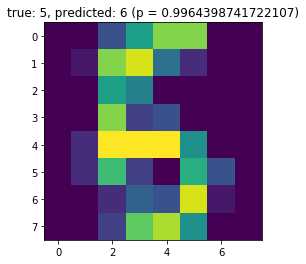

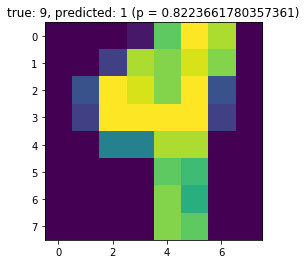

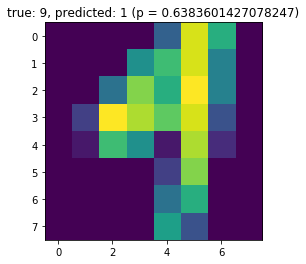

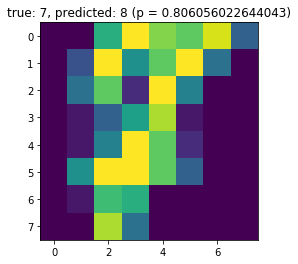

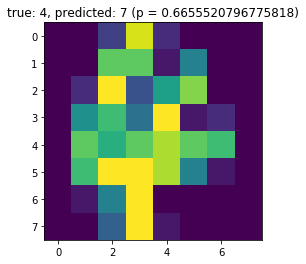

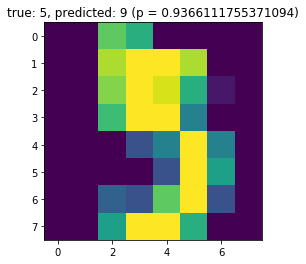

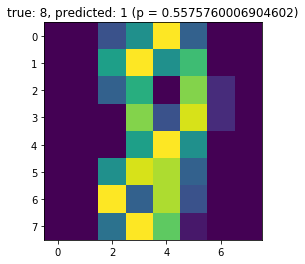

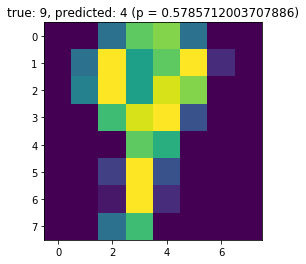

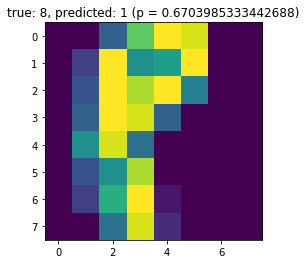

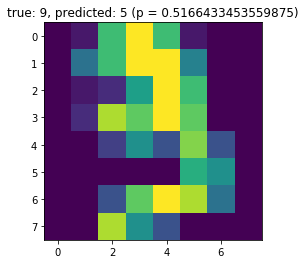

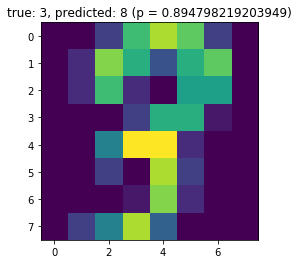

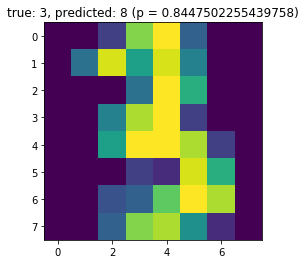

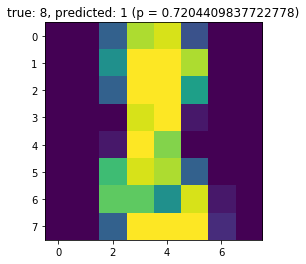

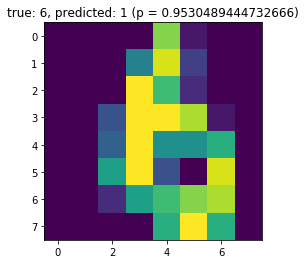

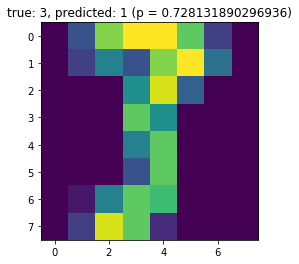

In [10]:
for x, pred, test in zip(X_test, y_pred, y_test):
    if np.argmax(pred) != np.argmax(test):
        plt.figure()
        plt.title(f'true: {np.argmax(test)}, predicted: {np.argmax(pred)} (p = {np.max(pred)})')
        plt.imshow(x[..., 0])